Настало время попробовать свои силы в настоящей Data-Science-задаче.

Вам представлены данные об оттоке клиентов некоторого банка.

In [58]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
display(churn_data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

2. CustomerId — идентификатор клиента

3. Surname — фамилия клиента

4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

5. Geography — страна клиента (банк международный)

6. Gender — пол клиента

7. Age — возраст клиента

8. Tenure — сколько лет клиент пользуется услугами банка

9. Balance — баланс на счетах клиента в банке

10. NumOfProducts — количество услуг банка, которые приобрёл клиент

11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

13. EstimatedSalary — предполагаемая заработная плата клиента

14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [59]:
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. 

Иными словами, нужно **установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов**.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

---

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

import seaborn as sns

import plotly
import plotly.express as px

**Задание 9.1**

Каково соотношение ушедших и лояльных клиентов? 

Покажите это на графике и дайте комментарий по соотношению.

In [62]:
exited_count = churn_data['Exited'].value_counts()
print(exited_count)

Exited
0    7963
1    2037
Name: count, dtype: int64


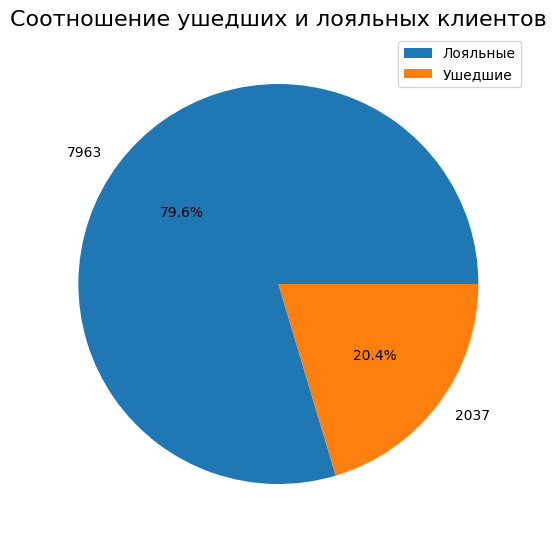

In [63]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_count,
    labels=exited_count,
    autopct='%0.1f%%',
)

axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
axes.legend(['Лояльные','Ушедшие'])

plt.show(axes);

Так как нам нужно определить процентные доли от единого целого (от общего количества клиентов), используем для решения задачи круговую диаграмму.

Из графика видно, что количество ушедших клиентов составляет одну пятую от общего количества клиентов и одну четверть от количества лояльных клиентов.

---

**Задание 9.2**

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 

Опишите распределение и сделайте выводы.

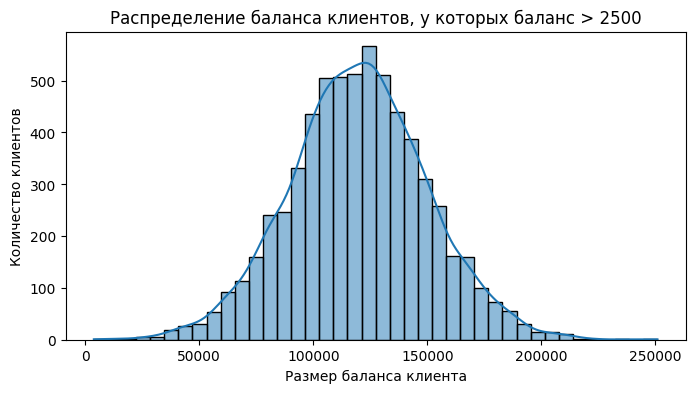

In [64]:
balance_data = churn_data[churn_data["Balance"] > 2500]

fig = plt.figure(figsize=(8, 4))
histplot = sns.histplot(
    data=balance_data,
    x='Balance', 
    bins=40,
    kde=True
)

histplot.set_title("Распределение баланса клиентов, у которых баланс > 2500")
histplot.set_xlabel('Размер баланса клиента')
histplot.set_ylabel('Количество клиентов')

plt.show(histplot);

Так как необходимо выяснить распределение признака, используем для решения задачи гистограмму.

Из графика видно, что основная часть клиентов имеет баланс в пределах 90-150 тысяч. До этого интервала количество клиентов (с балансом от 2,5 до 90 тысяч) плавно увеличивается, а после этого интервала количество клиентов (с балансом выше 150 тысяч) плавно сокращается. Таким образом распределение балансов клиентов представляет из себя плавную синусоиду.

---

**Задание 9.3**

Посмотрите на распределение баланса клиента в разрезе признака оттока. 

Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 

Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

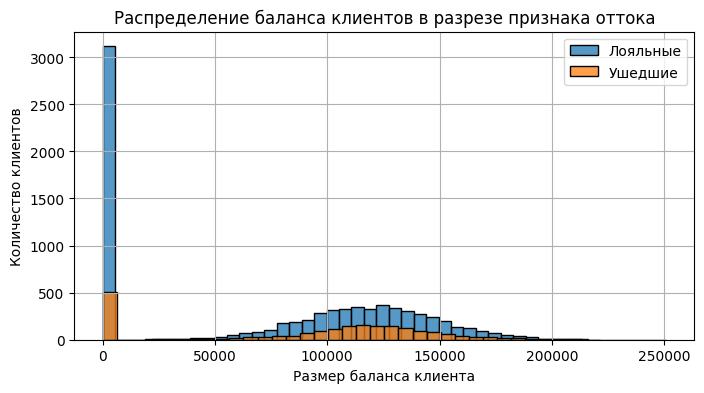

In [65]:
exited_data_0 = churn_data[churn_data["Exited"] == 0]
exited_data_1 = churn_data[churn_data["Exited"] == 1]

fig = plt.figure(figsize=(8, 4))
histplot = sns.histplot(
    data=exited_data_0,
    x='Balance',
    label='Лояльные', 
    bins=40
)

histplot = sns.histplot(
    data=exited_data_1,
    x='Balance',
    label='Ушедшие', 
    bins=40
)

histplot.set_title("Распределение баланса клиентов в разрезе признака оттока")
histplot.set_xlabel('Размер баланса клиента')
histplot.set_ylabel('Количество клиентов')
histplot.legend()
histplot.grid();

Так как необходимо выяснить распределение признака, используем для решения задачи гистограмму. Накладываем гистограмму распределения баланса у ушедших клиентов на гистограмму распределения баланса у лояльных клиентов.

Из полученного наложения гистограмм видно, что лояльные клиенты имеют гораздо больше (около 40% из них) счетов с небольшим балансом по сравнению с ушедшими клиентами (около 25% из них). В остальном распределение балансов у лояльных и у ушедших клиентов практически одинаковое, а именно: в обоих случаях наблюдается плавное увеличение количества счетов по мере роста размеров балансов до уровня 90-150 тысяч и затем такое же плавное сокращение количества счетов. 

Так как большинство ушедших клиентов предпочитали крупные вклады, возможно отток клиентов из банка связан с невыгодными условиями для крупных вкладов. 

---

**Задание 9.4**

Посмотрите на распределение возраста в разрезе признака оттока. 

В какой группе больше потенциальных выбросов? 

На какую возрастную категорию клиентов стоит обратить внимание банку?

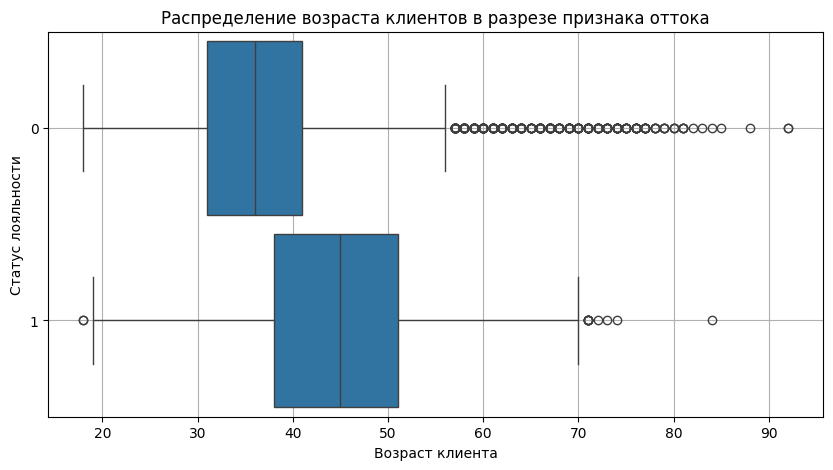

In [66]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)

boxplot.set_title('Распределение возраста клиентов в разрезе признака оттока')
boxplot.set_xlabel('Возраст клиента')
boxplot.set_ylabel('Статус лояльности')
boxplot.grid()

Так как необходимо выяснить распределение признака с учетом потенциальных выбросов, используем для решения задачи коробчатую диаграмму.

Из полученной диаграммы видно, что у лояльных клиентов гораздо большее количество потенциальных выбросов.

Также видно, что возраст лояльных клиентов ниже (в среднем на 10 лет), чем у ушедших. Следовательно, банку стоит обратить внимание на более возрастную категорию.  

---

**Задание 9.5**

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. 

Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

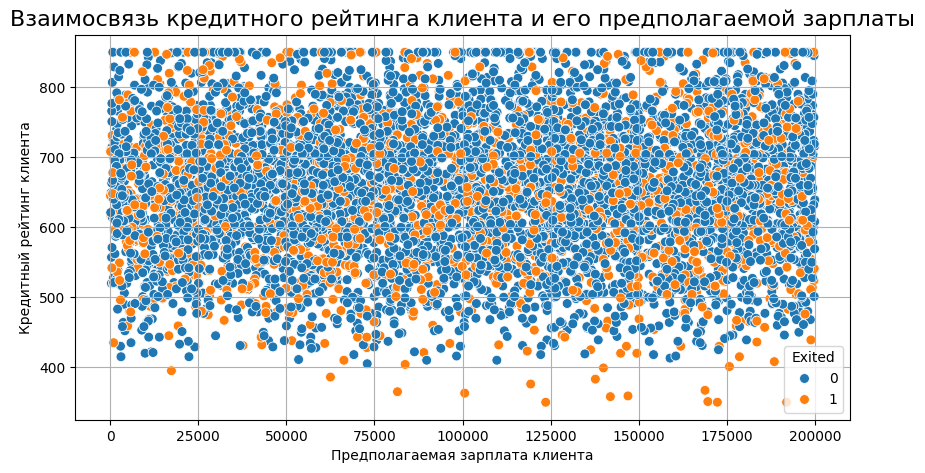

In [67]:
fig = plt.figure(figsize=(10, 5))
scatterplot = sns.scatterplot(
    data=balance_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    s=50
)

scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Предполагаемая зарплата клиента')
scatterplot.set_ylabel('Кредитный рейтинг клиента')
scatterplot.grid();

Так как необходимо показать взаимосвязь двух признаков с добавлением расцветки точек по третьему признаку, используем для решения задачи диаграмму рассеяния с группировкой по цвету.

Явной зависимости предполагаемых зарплат клиентов от их кредитных рейтингов не наблюдается.

Единственное на что можно обратить внимание это то, что большинство клиентов банка вне зависимости от зарплаты и лояльности имеют кредитный рейтинг в диапазоне от 500 до 800. А также то, что кредитный рейтинг ниже 400 имеют только ушедшие клиенты.

---

**Задание 9.6**

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [68]:
exited_count_1 = churn_data[churn_data["Exited"] == 1]['Gender'].value_counts()
print(exited_count_1)

Gender
Female    1139
Male       898
Name: count, dtype: int64


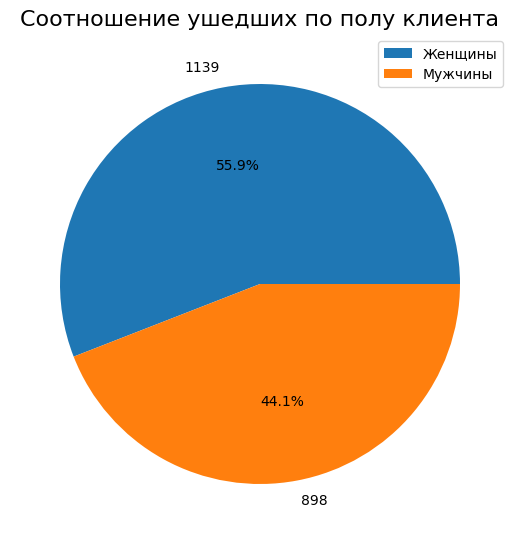

In [69]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_count_1,
    labels=exited_count_1,
    autopct='%0.1f%%',
)

axes.set_title('Соотношение ушедших по полу клиента', fontsize=16)
axes.legend(['Женщины','Мужчины']);

Так как нам нужно определить процентные доли от единого целого (от общего количества ушедших клиентов), используем для решения задачи круговую диаграмму.

Из диаграммы видно, что чаще (однако незначительно) уходят женщины.

---

**Задание 9.7**

Как отток клиентов зависит от числа приобретённых у банка услуг? 

Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [70]:
# Создаем новый признак, в котором у лояльных клиентов будет 1, а у ушедших - 0.
churn_data['Loyal'] = 1 - churn_data['Exited']

# Группируем признак приобретенных у банка услуг по количеству приобретших эти услуги
# ушедших и лояльных клиентов.
grouped_by_exit = churn_data.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum()
print(grouped_by_exit)

               Exited  Loyal
NumOfProducts               
1                1409   3675
2                 348   4242
3                 220     46
4                  60      0


In [71]:
fig = px.bar(
    data_frame=grouped_by_exit,
    x=grouped_by_exit.index,
    y=['Exited', 'Loyal'],
    barmode='group',
    title='Зависимость количества приобретенных у банка услуг от лояльности клиента',
    text_auto=True
)

fig.show()

Из полученной диаграммы видно, что подавляющее большинство ушедших клиентов приобрело у банка лишь одну услугу.

Однако часть ушедших клиентов приобретало и 2, и 3, и 4 услуги. В отличие от лояльных клиентов, которые почти все сосредоточились на приобретении только одной или двух услуг.

---

**Задание 9.8**

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 

Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [72]:
# Создаем новый признак, в котором у лояльных клиентов будет 1, а у ушедших - 0.
churn_data['Loyal'] = 1 - churn_data['Exited']

# Группируем признак активности клиентов банка по количеству активных/неактивных
# ушедших и лояльных клиентов.
grouped_by_active = churn_data.groupby(['IsActiveMember'])[['Exited', 'Loyal']].sum()
print(grouped_by_active)

                Exited  Loyal
IsActiveMember               
0                 1302   3547
1                  735   4416


In [73]:
fig = px.bar(
    data_frame=grouped_by_active,
    x=grouped_by_active.index,
    y=['Exited', 'Loyal'],
    barmode='group',
    title='Зависимость активного статуса клиента банка от лояльности клиента',
    text_auto=True
)

fig.show()

Из полученной диаграммы видно, что почти две трети ушедших клиентов не имели статуса активного клиента банка. В то время как большинство лояльных клиентов его имеют.

Следовательно банку каким-то образом желательно стараться увеличивать активность клиентов.

---

**Задание 9.9**

В какой стране доля ушедших клиентов больше? 

Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 

Предположите, с чем это может быть связано.

In [74]:
# Группируем страны по среднему значению признака оттока (Exited) — доле ушедших клиентов.
choropleth_data = churn_data.groupby('Geography')['Exited'].mean().reset_index()
choropleth_data

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [75]:
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.5], #диапазон цвета
    title='Распределение ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

fig.show() #отображаем график

Из графика видно, что больше всего ушедших клиентов в Германии (в два раза больше, чем в двух других странах: Франции и Испании).

С чем это может быть связано предположить затрудняюсь.

---

**Задание 9.10**

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [76]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "6-Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "5-Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "4-Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "3-Good"
    elif credit_score >= 781 and credit_score < 851:
        return "2-Excellent"
    elif credit_score >= 851:
        return "1-Top"
    elif credit_score < 300:
        return "7-Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [77]:
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc=['mean']
)

display(pivot)

mean                                                    \
Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
2-Excellent     0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
3-Good          0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
4-Fair          0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
5-Poor          0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
6-Very_Poor     0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

                                                                  
Tenure                6         7         8         9         10  
CreditScoreCat                                                    
2-Excellent     0.241379  0.127660  0.196078  0.270833  0.254902  
3-Good          0.182857  0.191892  0.152355  0.194667  0.197802  
4-Fair          0.236364  0.171103  0.209016  0.190045  0.205357  
5-Poor          0.179916  0.151261  0.214575  0.251082  0.169492  
6-Very_Poor     0.225352  0.206349  0.253521  0.229508  0.333333

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 

Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

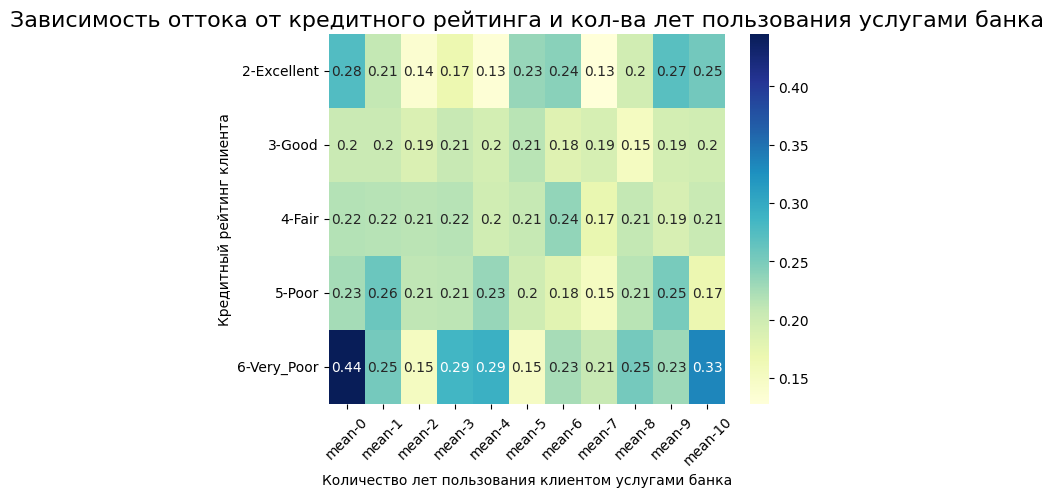

In [78]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', annot=True)

heatmap.set_title('Зависимость оттока от кредитного рейтинга и кол-ва лет пользования услугами банка', fontsize=16)
heatmap.set_xlabel('Количество лет пользования клиентом услугами банка')
heatmap.set_ylabel('Кредитный рейтинг клиента')
heatmap.xaxis.set_tick_params(rotation=45)
heatmap.yaxis.set_tick_params(rotation=0);

Из полученной тепловой карты видно, что чаще всего уходят клиенты с низким кредитным рейтингом (Very Poor). Причем из них чаще всего уходят клиенты, которые пользовались услугами банка менее одного года; на втором месте - наоборот, клиенты, которые пользовались услугами банка 10 лет; на третьем месте - клиенты, которые пользовались услугами банка 3-4 года.

На втором месте по оттоку - клиенты с высоким кредитным рейтингом (Excellent), которые пользовались услугами банка менее года и 9 лет.